In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [2]:
input_ = Input(shape=(28, 28, 1))

x = Conv2D(32, 3, activation='relu')(input_)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

output_ = Dense(10, activation= 'softmax')(x)

cnn = Model(inputs=input_, outputs=output_)

cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                             

In [3]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 16s 11ms/step - loss: 0.2303 - accuracy: 0.9308 - val_loss: 0.0509 - val_accuracy: 0.9827
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0847 - accuracy: 0.9751 - val_loss: 0.0400 - val_accuracy: 0.9867
Epoch 3/30
469/469 [==============================] - 5s 11ms/step - loss: 0.0641 - accuracy: 0.9812 - val_loss: 0.0364 - val_accuracy: 0.9867
Epoch 4/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0531 - accuracy: 0.9836 - val_loss: 0.0353 - val_accuracy: 0.9880
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.0426 - accuracy: 0.9867 - val_loss: 0.0287 - val_accuracy: 0.9907
Epoch 6/30
469/469 [==============================] - 5s 11ms/step - loss: 0.0393 - accuracy: 0.9875 - val_loss: 0.0272 - val_accuracy: 0.9913
Epoch 7/30
469/469 [==============================] - 4s 10ms/step - loss: 0.0340 - accuracy: 0.9891 - val_loss: 0.0307 - val_accuracy: 0.9908
E

In [4]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0373 - accuracy: 0.9923


[0.03731909021735191, 0.9922999739646912]

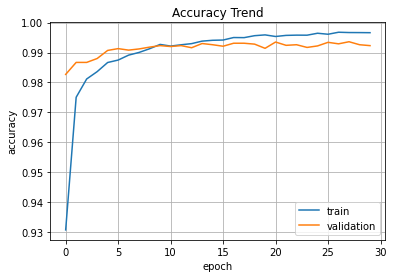

In [5]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()

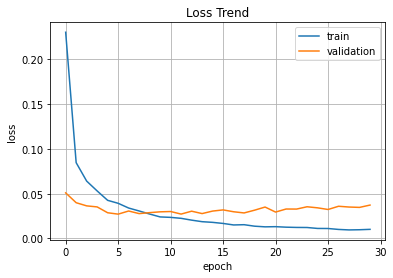

In [6]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.grid()
plt.show()